DATE - 01/06/2023

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense

from tensorflow.keras import Sequential

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#MNIST DATASET WHICH IS PRESTORED IN KERAS LIBRARY
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training set have 60000 snapshot of handwritten digits which have image size of 28*28

5

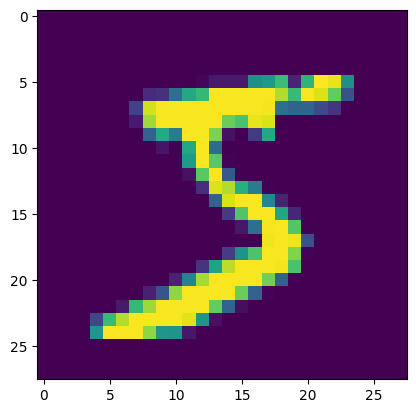

In [29]:
#1th digit snapshot for training
plt.imshow(X_train[0])
#digit is 
y_train[0]

7

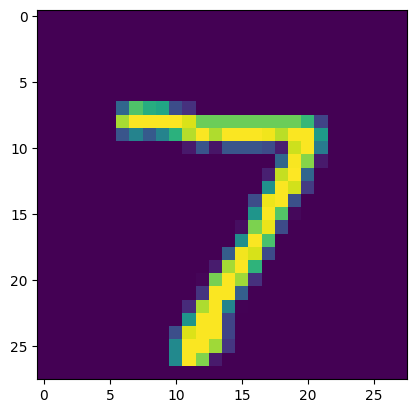

In [30]:
#1th digit snapshot for test
plt.imshow(X_test[0])
#digit is 
y_test[0]

In [31]:
#Normalizing data 
X_train = X_train / 255
X_test = X_test/255

In [32]:
#As we know our data is 2D(28*28) array so convertning it into 1D array we have to flatten
oneD = 28*28
X_train_flattened = X_train.reshape(len(X_train) , oneD)
X_test_flattened = X_test.reshape(len(X_test)  , oneD)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [33]:
class_mod = Sequential()

In [34]:
class_mod.add(Flatten(input_shape = (28,28)))
# class_mod.add(Dense(128,activation='relu'))  #nodesize = 128 
class_mod.add(Dense(10,activation = 'softmax')) #10 is 0 to 9 number classification

In [35]:
class_mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [36]:
from sklearn.metrics import f1_score

In [37]:
class_mod.compile(optimizer='Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
result = class_mod.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 2s 3ms/step - loss: 0.6004 - accuracy: 0.8474 - val_loss: 0.3529 - val_accuracy: 0.9039
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3425 - accuracy: 0.9058 - val_loss: 0.3043 - val_accuracy: 0.9165
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3091 - accuracy: 0.9142 - val_loss: 0.2876 - val_accuracy: 0.9212
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2929 - accuracy: 0.9185 - val_loss: 0.2782 - val_accuracy: 0.9222
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2830 - accuracy: 0.9207 - val_loss: 0.2722 - val_accuracy: 0.9252


In [39]:
class_mod.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.9229


[0.2765629291534424, 0.9229000210762024]

In [40]:
y_pred = class_mod.predict(X_test)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.6137312e-05, 1.1739214e-09, 3.9191556e-05, 3.4030671e-03,
       1.7296560e-06, 3.0373367e-05, 1.2622288e-08, 9.9560720e-01,
       3.4734941e-05, 8.6746935e-04], dtype=float32)

10 scores

In [41]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [42]:
np.argmax(y_pred[0])

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
# y_predicted_labels[:5]

In [44]:
con_mat = tf.math.confusion_matrix(labels=y_test , predictions = y_predicted_labels)

Text(50.722222222222214, 0.5, 'actual')

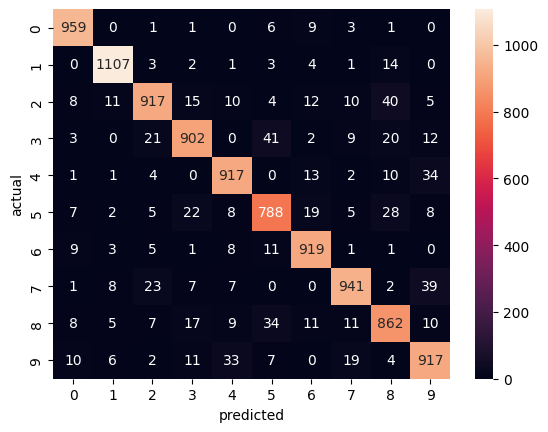

In [45]:
import seaborn as sn
sn.heatmap(con_mat, annot=True , fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [46]:
from sklearn.metrics import confusion_matrix, f1_score


# Compute the F1 score for each class
f1_scores = f1_score(y_test, y_predicted_labels, labels=None, average=None, sample_weight=None, zero_division='warn')

# Compute the macro-average F1 score
macro_average_f1 = f1_score(y_test, y_predicted_labels, labels=None, average='macro', sample_weight=None, zero_division='warn')

print("F1 Score for each class:", f1_scores)
print("Macro-average F1 Score:", macro_average_f1)



F1 Score for each class: [0.96576032 0.97190518 0.90792079 0.90744467 0.92860759 0.88241881
 0.94401644 0.9270936  0.88139059 0.90167158]
Macro-average F1 Score: 0.9218229577987638


#TRAINING OTHER MODEL WHICH INCLUDES HIDDEN LAYER ISING Rectified activation function  

In [64]:
model_2 = Sequential()

In [65]:
model_2.add(Flatten(input_shape = (28,28)))
model_2.add(Dense(128,activation='relu'))  #nodesize = 128 
model_2.add(Dense(10,activation = 'softmax')) #10 is 0 to 9 number classification

In [66]:
model_2.compile(optimizer='Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
result = model_2.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1, validation_split=0.2)  #Epoches= 10 changes

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3311 - accuracy: 0.9071 - val_loss: 0.1792 - val_accuracy: 0.9495
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1571 - accuracy: 0.9540 - val_loss: 0.1342 - val_accuracy: 0.9613
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1089 - accuracy: 0.9679 - val_loss: 0.1179 - val_accuracy: 0.9632
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0822 - accuracy: 0.9761 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0944 - val_accuracy: 0.9706
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0930 - val_accuracy: 0.9719
Epoch 

In [69]:
model_2.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9762


[0.07767082750797272, 0.9761999845504761]

In [70]:
y_pred = model_2.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([3.6709746e-08, 6.9977873e-10, 1.1885392e-06, 2.4816552e-05,
       1.6568568e-13, 4.3081205e-10, 4.0587286e-15, 9.9997181e-01,
       4.5971171e-07, 1.7094018e-06], dtype=float32)

In [71]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[0]

7

In [72]:
f1_scores = f1_score(y_test, y_predicted_labels, labels=None, average=None, sample_weight=None, zero_division='warn')

# Compute the macro-average F1 score
macro_average_f1 = f1_score(y_test, y_predicted_labels, labels=None, average='macro', sample_weight=None, zero_division='warn')

print("F1 Score for each class:", f1_scores)
print("Macro-average F1 Score:", macro_average_f1)

F1 Score for each class: [0.98274112 0.98855634 0.97128954 0.97273178 0.97898514 0.97511312
 0.97763911 0.97289448 0.97012658 0.97054418]
Macro-average F1 Score: 0.9760621384021271


Getting better result